<a href="https://colab.research.google.com/github/jackhamilton08/test/blob/main/Handwritten_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

Push test

In [ ]:
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream = True)

In [ ]:
with open("ind.traineddata", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
            file.write(block)

In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
libmagickwand-dev is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.13).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [ ]:
from IPython.display import HTML, clear_output
clear_output()

In [ ]:
! pip install pytesseract wand opencv-python
clear_output()

In [ ]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

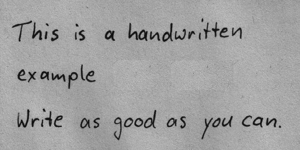

In [ ]:
image = Image.open('handwrittensample.png')
image = image.resize((300,150))
image.save('sample.png')
image

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'tesseract'

In [ ]:
custom_config = r'-l eng --oem 3 --psm 6' 
text = pytesseract.image_to_string(image,config=custom_config)
print(text)

This is a handwritten
example
Write as good as you can.



In [ ]:
try:
    text=pytesseract.image_to_string(image,lang="eng")
    characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
    new_string = text
    for character in characters_to_remove:
        new_string = new_string.replace(character, "")
    print(new_string)
except IOError as e:
    print("Error (%s)." % e)

This is a handwritten
example

Write as good as you can.



In [ ]:
image = cv2.imread('sample.png')

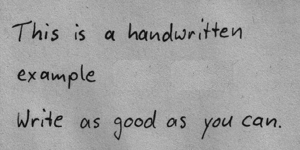

In [ ]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)

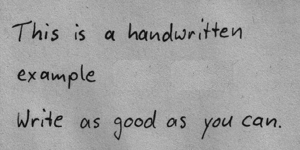

In [ ]:
def remove_noise(image):
    return cv2.medianBlur(image,5)
noise = remove_noise(gray)
Image.fromarray(gray)

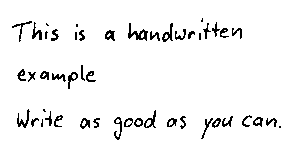

In [ ]:
def thresholding(image):
                        # source image,  grayscale image
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)

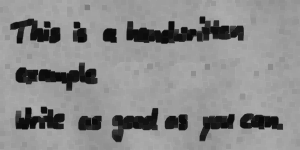

In [ ]:
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
erode = erode(gray)
Image.fromarray(erode)

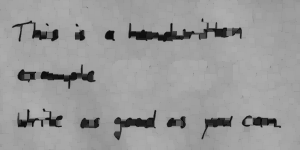

In [ ]:
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
opening = opening(gray)
Image.fromarray(opening)

In [ ]:
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
match = match_template(gray, gray)
match

array([[1.]], dtype=float32)

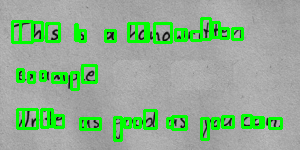

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	300	150	-1	
2	1	1	0	0	0	11	17	233	74	-1	
3	1	1	1	0	0	11	17	233	74	-1	
4	1	1	1	1	0	11	17	233	27	-1	
5	1	1	1	1	1	11	20	50	24	60	(HS
5	1	1	1	1	2	74	23	13	20	33	bs
5	1	1	1	1	3	104	29	13	14	34	a
5	1	1	1	1	4	127	17	117	27	0	Vaolacitten
4	1	1	1	2	0	16	64	82	27	-1	
5	1	1	1	2	1	16	64	82	27	26	Exaile
2	1	2	0	0	0	16	108	267	34	-1	
3	1	2	1	0	0	16	108	267	34	-1	
4	1	2	1	1	0	16	108	267	34	-1	
5	1	2	1	1	1	16	108	49	22	51	Welle
5	1	2	1	1	2	79	117	23	14	53	ws
5	1	2	1	1	3	113	109	45	33	3	pool
5	1	2	1	1	4	166	115	22	16	71	as
5	1	2	1	1	5	200	115	35	26	57	yom
5	1	2	1	1	6	241	114	42	16	77	Gam



In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread('sample.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)
cv2_imshow(img)
print(pytesseract.image_to_data(img))

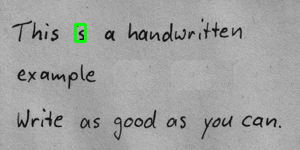

In [ ]:
img = cv2.imread('sample.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = 'i'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
Image.fromarray(img)